In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

In [2]:
# Load data
data = pd.read_csv('country_wise_latest.csv')

In [3]:
# Extract relevant columns
data_cluster = data[['Confirmed', 'Deaths']]

In [4]:
# Handle missing values (if any)
data_cluster = data_cluster.dropna()


In [5]:
# Normalize the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_cluster)

In [6]:
# Apply Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=3, random_state=42)  # Set n_components as needed
gmm.fit(data_normalized)

GaussianMixture(n_components=3, random_state=42)

In [7]:
# Predict cluster labels
clusters = gmm.predict(data_normalized)
data['Cluster'] = clusters

In [8]:
# Show input data
print("Input Data:")
print(data_cluster.head())

Input Data:
   Confirmed  Deaths
0      36263    1269
1       4880     144
2      27973    1163
3        907      52
4        950      41


In [9]:
# Show output data with clusters
print("\nOutput Data with Clusters:")
print(data[['Country/Region', 'Confirmed', 'Deaths', 'Cluster']].head())


Output Data with Clusters:
  Country/Region  Confirmed  Deaths  Cluster
0    Afghanistan      36263    1269        0
1        Albania       4880     144        0
2        Algeria      27973    1163        0
3        Andorra        907      52        0
4         Angola        950      41        0


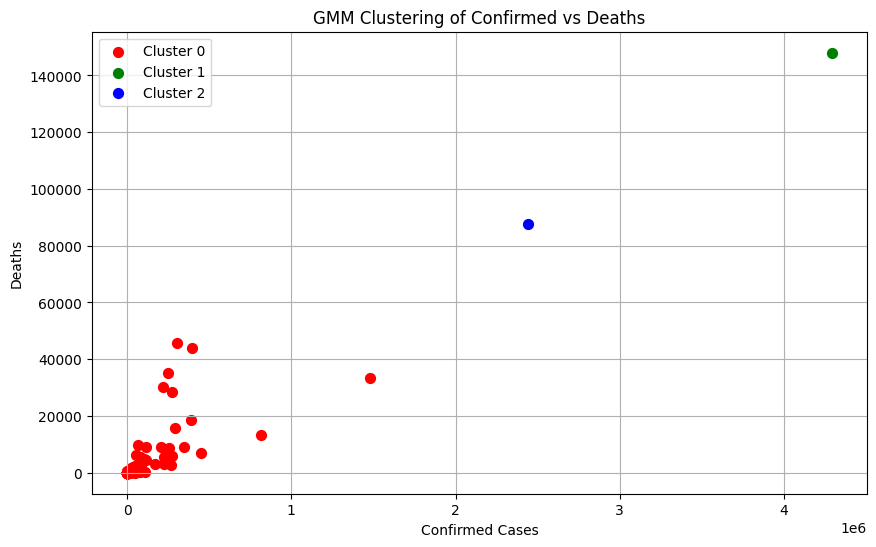

In [10]:
# Plot the clustering result
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
for cluster_id in range(gmm.n_components):
    cluster_data = data_cluster[clusters == cluster_id]
    plt.scatter(cluster_data['Confirmed'], cluster_data['Deaths'], 
                s=50, c=colors[cluster_id], label=f'Cluster {cluster_id}')

plt.title('GMM Clustering of Confirmed vs Deaths')
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.legend()
plt.grid()
plt.show()